# This Notebook Covers:
- Auto ML using H2o.ai
- H2o.ai has been run on the cleaned information of profiles of admit/reject of students for Northeastern Universitie for CS students
- Error metrices have been calculated for H2o.ai classification models
- Summarization of Model below

In [2]:
import pandas as pd
import h2o

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\navee\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\navee\AppData\Local\Temp\tmp6s1tahfj
  JVM stdout: C:\Users\navee\AppData\Local\Temp\tmp6s1tahfj\h2o_navee_started_from_python.out
  JVM stderr: C:\Users\navee\AppData\Local\Temp\tmp6s1tahfj\h2o_navee_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_navee_e2i973
H2O cluster total nodes:,1
H2O cluster free memory:,3.500 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [4]:
# Reading the Records for Northeastern University
dataset = pd.read_csv(r'../../Data/all_records_northeastern.csv')

In [6]:
dataset.drop(columns=["Unnamed: 0"],inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
#making a stratified split on university name and status to have all scenarios in train and test dataset
train,test = train_test_split(dataset, test_size=0.25, random_state=0, 
                               stratify=dataset[['status']])

In [10]:
# Accept and Reject for NEU
dataset.status.value_counts()

reject    1079
accept     574
Name: status, dtype: int64

In [11]:
#checking train test split
train['status'].value_counts()

reject    809
accept    430
Name: status, dtype: int64

In [12]:
test['status'].value_counts()

reject    270
accept    144
Name: status, dtype: int64

In [13]:
train.to_csv('../Data/neudata_train.csv',index=False)
test.to_csv('../Data/neudata_test.csv',index=False)

In [14]:
train['status']

166     reject
1311    accept
1372    accept
1405    accept
1602    accept
1287    accept
1534    accept
1073    reject
1637    accept
572     reject
999     reject
519     reject
260     reject
539     reject
369     reject
157     reject
818     reject
1377    accept
277     reject
516     reject
1644    accept
611     reject
125     reject
1104    accept
881     reject
770     reject
4       reject
1469    accept
1392    accept
168     reject
         ...  
974     reject
1528    accept
1244    accept
1531    accept
760     reject
849     reject
733     reject
182     reject
1158    accept
1192    accept
889     reject
826     reject
1089    accept
1285    accept
1341    accept
1434    accept
77      reject
1268    accept
608     reject
1128    accept
1506    accept
1320    accept
1360    accept
1235    accept
557     reject
681     reject
724     reject
1269    accept
384     reject
1236    accept
Name: status, Length: 1239, dtype: object

In [15]:
train_frame= h2o.import_file('../Data/neudata_train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
training_columns=train.drop(columns=['status']).columns.tolist()
response_column='status'

In [17]:
training_columns

['gre_score',
 'gre_score_quant',
 'gre_score_verbal',
 'test_score_toefl',
 'undergraduation_score',
 'work_ex',
 'papers_published']

In [18]:
from h2o.automl import H2OAutoML

In [19]:
model = H2OAutoML(max_models=20, seed=1)
model.train(x=training_columns, y=response_column, training_frame=train_frame)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [20]:
# Best Models for the dataset
model.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190425_050507,0.766408,0.546126,0.378618,0.430401,0.185245
StackedEnsemble_BestOfFamily_AutoML_20190425_050507,0.764477,0.54897,0.359186,0.431469,0.186166
GBM_2_AutoML_20190425_050507,0.761944,0.547865,0.426251,0.432134,0.18674
GBM_5_AutoML_20190425_050507,0.757555,0.547797,0.399255,0.430732,0.18553
GBM_1_AutoML_20190425_050507,0.756695,0.550818,0.439147,0.434785,0.189038
DRF_1_AutoML_20190425_050507,0.756569,0.626286,0.389303,0.435171,0.189374
GBM_4_AutoML_20190425_050507,0.754591,0.555352,0.384547,0.436547,0.190573
GBM_3_AutoML_20190425_050507,0.751879,0.557406,0.463597,0.436982,0.190954
XRT_1_AutoML_20190425_050507,0.746325,0.818775,0.44209,0.440452,0.193998
GBM_grid_1_AutoML_20190425_050507_model_2,0.745889,0.611823,0.457856,0.45982,0.211435


In [21]:
model_path = h2o.save_model(model=model.leader, path="/Models", force=True)

In [23]:
model.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190425_050507
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08361518835358038
RMSE: 0.2891629097128129
LogLoss: 0.3094058022267709
Null degrees of freedom: 1238
Residual degrees of freedom: 1231
Null deviance: 1599.8064594050386
Residual deviance: 766.7075779179382
AIC: 782.7075779179382
AUC: 0.9868097277718688
pr_auc: 0.9893338340617703
Gini: 0.9736194555437376
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5620218875143329: 


,accept,reject,Error,Rate
accept,394.0,36.0,0.0837,(36.0/430.0)
reject,33.0,776.0,0.0408,(33.0/809.0)
Total,427.0,812.0,0.0557,(69.0/1239.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5620219,0.9574337,218.0
max f2,0.4739480,0.9711795,254.0
max f0point5,0.6498066,0.9627246,180.0
max accuracy,0.5847304,0.9443099,210.0
max precision,0.9307652,1.0,0.0
max recall,0.3150014,1.0,319.0
max specificity,0.9307652,1.0,0.0
max absolute_mcc,0.5847304,0.8782183,210.0
max min_per_class_accuracy,0.5983522,0.9395349,205.0
max mean_per_class_accuracy,0.5847304,0.9421019,210.0


Gains/Lift Table: Avg response rate: 65.29 %, avg score: 65.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104923,0.9286256,1.5315204,1.5315204,1.0,0.9296789,1.0,0.9296789,0.0160692,0.0160692,53.1520396,53.1520396
,2,0.0201776,0.9271168,1.5315204,1.5315204,1.0,0.9279720,1.0,0.9288596,0.0148331,0.0309023,53.1520396,53.1520396
,3,0.0306699,0.9259086,1.5315204,1.5315204,1.0,0.9264918,1.0,0.9280496,0.0160692,0.0469716,53.1520396,53.1520396
,4,0.0403551,0.9246307,1.5315204,1.5315204,1.0,0.9253618,1.0,0.9274045,0.0148331,0.0618047,53.1520396,53.1520396
,5,0.0500404,0.9225678,1.5315204,1.5315204,1.0,0.9239496,1.0,0.9267358,0.0148331,0.0766378,53.1520396,53.1520396
,6,0.1000807,0.9143060,1.5315204,1.5315204,1.0,0.9183531,1.0,0.9225445,0.0766378,0.1532756,53.1520396,53.1520396
,7,0.1501211,0.9057261,1.5315204,1.5315204,1.0,0.9103723,1.0,0.9184871,0.0766378,0.2299135,53.1520396,53.1520396
,8,0.2001614,0.8959052,1.5315204,1.5315204,1.0,0.9008179,1.0,0.9140698,0.0766378,0.3065513,53.1520396,53.1520396
,9,0.3002421,0.8604928,1.5315204,1.5315204,1.0,0.8797798,1.0,0.9026398,0.1532756,0.4598269,53.1520396,53.1520396
,10,0.4011299,0.7995008,1.5315204,1.5315204,1.0,0.8332465,1.0,0.8851868,0.1545117,0.6143387,53.1520396,53.1520396




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18524468102075511
RMSE: 0.4304006052746152
LogLoss: 0.5461258658711712
Null degrees of freedom: 1238
Residual degrees of freedom: 1232
Null deviance: 1602.5473814403863
Residual deviance: 1353.2998956287622
AIC: 1367.2998956287622
AUC: 0.76640842843591
pr_auc: 0.8605690616388165
Gini: 0.5328168568718199
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3991011986704242: 


,accept,reject,Error,Rate
accept,140.0,290.0,0.6744,(290.0/430.0)
reject,67.0,742.0,0.0828,(67.0/809.0)
Total,207.0,1032.0,0.2881,(357.0/1239.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3991012,0.8060837,296.0
max f2,0.1244160,0.9039106,399.0
max f0point5,0.6965354,0.7918282,159.0
max accuracy,0.4653894,0.7191283,269.0
max precision,0.9297717,1.0,0.0
max recall,0.1244160,1.0,399.0
max specificity,0.9297717,1.0,0.0
max absolute_mcc,0.7422556,0.3990288,131.0
max min_per_class_accuracy,0.6565724,0.6934487,177.0
max mean_per_class_accuracy,0.7422556,0.7079972,131.0


Gains/Lift Table: Avg response rate: 65.29 %, avg score: 65.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104923,0.9210280,1.4137111,1.4137111,0.9230769,0.9244050,0.9230769,0.9244050,0.0148331,0.0148331,41.3711134,41.3711134
,2,0.0201776,0.9173271,1.5315204,1.4702596,1.0,0.9191417,0.96,0.9218786,0.0148331,0.0296663,53.1520396,47.0259580
,3,0.0306699,0.9142142,1.5315204,1.4912172,1.0,0.9155286,0.9736842,0.9197062,0.0160692,0.0457355,53.1520396,49.1217227
,4,0.0403551,0.9125599,1.5315204,1.5008900,1.0,0.9134059,0.98,0.9181942,0.0148331,0.0605686,53.1520396,50.0889988
,5,0.0500404,0.9102421,1.5315204,1.5068185,1.0,0.9112232,0.9838710,0.9168450,0.0148331,0.0754017,53.1520396,50.6818454
,6,0.1000807,0.8994399,1.4080107,1.4574146,0.9193548,0.9052953,0.9516129,0.9110701,0.0704574,0.1458591,40.8010686,45.7414570
,7,0.1501211,0.8881482,1.3339049,1.4162447,0.8709677,0.8949422,0.9247312,0.9056941,0.0667491,0.2126082,33.3904861,41.6244667
,8,0.2001614,0.8732488,1.4574146,1.4265371,0.9516129,0.8811612,0.9314516,0.8995609,0.0729295,0.2855377,45.7414570,42.6537143
,9,0.3002421,0.8211508,1.4574146,1.4368296,0.9516129,0.8490058,0.9381720,0.8827092,0.1458591,0.4313968,45.7414570,43.6829618
,10,0.4003228,0.7669465,1.0374816,1.3369926,0.6774194,0.7968304,0.8729839,0.8612395,0.1038319,0.5352287,3.7481558,33.6992603


In [24]:
saved_model = h2o.load_model(model_path)

In [25]:
saved_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190425_050507
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08361518835358038
RMSE: 0.2891629097128129
LogLoss: 0.3094058022267709
Null degrees of freedom: 1238
Residual degrees of freedom: 1231
Null deviance: 1599.8064594050386
Residual deviance: 766.7075779179382
AIC: 782.7075779179382
AUC: 0.9868097277718688
pr_auc: 0.9893338340617703
Gini: 0.9736194555437376
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5620218875143329: 


,accept,reject,Error,Rate
accept,394.0,36.0,0.0837,(36.0/430.0)
reject,33.0,776.0,0.0408,(33.0/809.0)
Total,427.0,812.0,0.0557,(69.0/1239.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5620219,0.9574337,218.0
max f2,0.4739480,0.9711795,254.0
max f0point5,0.6498066,0.9627246,180.0
max accuracy,0.5847304,0.9443099,210.0
max precision,0.9307652,1.0,0.0
max recall,0.3150014,1.0,319.0
max specificity,0.9307652,1.0,0.0
max absolute_mcc,0.5847304,0.8782183,210.0
max min_per_class_accuracy,0.5983522,0.9395349,205.0
max mean_per_class_accuracy,0.5847304,0.9421019,210.0


Gains/Lift Table: Avg response rate: 65.29 %, avg score: 65.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104923,0.9286256,1.5315204,1.5315204,1.0,0.9296789,1.0,0.9296789,0.0160692,0.0160692,53.1520396,53.1520396
,2,0.0201776,0.9271168,1.5315204,1.5315204,1.0,0.9279720,1.0,0.9288596,0.0148331,0.0309023,53.1520396,53.1520396
,3,0.0306699,0.9259086,1.5315204,1.5315204,1.0,0.9264918,1.0,0.9280496,0.0160692,0.0469716,53.1520396,53.1520396
,4,0.0403551,0.9246307,1.5315204,1.5315204,1.0,0.9253618,1.0,0.9274045,0.0148331,0.0618047,53.1520396,53.1520396
,5,0.0500404,0.9225678,1.5315204,1.5315204,1.0,0.9239496,1.0,0.9267358,0.0148331,0.0766378,53.1520396,53.1520396
,6,0.1000807,0.9143060,1.5315204,1.5315204,1.0,0.9183531,1.0,0.9225445,0.0766378,0.1532756,53.1520396,53.1520396
,7,0.1501211,0.9057261,1.5315204,1.5315204,1.0,0.9103723,1.0,0.9184871,0.0766378,0.2299135,53.1520396,53.1520396
,8,0.2001614,0.8959052,1.5315204,1.5315204,1.0,0.9008179,1.0,0.9140698,0.0766378,0.3065513,53.1520396,53.1520396
,9,0.3002421,0.8604928,1.5315204,1.5315204,1.0,0.8797798,1.0,0.9026398,0.1532756,0.4598269,53.1520396,53.1520396
,10,0.4011299,0.7995008,1.5315204,1.5315204,1.0,0.8332465,1.0,0.8851868,0.1545117,0.6143387,53.1520396,53.1520396




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18524468102075511
RMSE: 0.4304006052746152
LogLoss: 0.5461258658711712
Null degrees of freedom: 1238
Residual degrees of freedom: 1232
Null deviance: 1602.5473814403863
Residual deviance: 1353.2998956287622
AIC: 1367.2998956287622
AUC: 0.76640842843591
pr_auc: 0.8605690616388165
Gini: 0.5328168568718199
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3991011986704242: 


,accept,reject,Error,Rate
accept,140.0,290.0,0.6744,(290.0/430.0)
reject,67.0,742.0,0.0828,(67.0/809.0)
Total,207.0,1032.0,0.2881,(357.0/1239.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3991012,0.8060837,296.0
max f2,0.1244160,0.9039106,399.0
max f0point5,0.6965354,0.7918282,159.0
max accuracy,0.4653894,0.7191283,269.0
max precision,0.9297717,1.0,0.0
max recall,0.1244160,1.0,399.0
max specificity,0.9297717,1.0,0.0
max absolute_mcc,0.7422556,0.3990288,131.0
max min_per_class_accuracy,0.6565724,0.6934487,177.0
max mean_per_class_accuracy,0.7422556,0.7079972,131.0


Gains/Lift Table: Avg response rate: 65.29 %, avg score: 65.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104923,0.9210280,1.4137111,1.4137111,0.9230769,0.9244050,0.9230769,0.9244050,0.0148331,0.0148331,41.3711134,41.3711134
,2,0.0201776,0.9173271,1.5315204,1.4702596,1.0,0.9191417,0.96,0.9218786,0.0148331,0.0296663,53.1520396,47.0259580
,3,0.0306699,0.9142142,1.5315204,1.4912172,1.0,0.9155286,0.9736842,0.9197062,0.0160692,0.0457355,53.1520396,49.1217227
,4,0.0403551,0.9125599,1.5315204,1.5008900,1.0,0.9134059,0.98,0.9181942,0.0148331,0.0605686,53.1520396,50.0889988
,5,0.0500404,0.9102421,1.5315204,1.5068185,1.0,0.9112232,0.9838710,0.9168450,0.0148331,0.0754017,53.1520396,50.6818454
,6,0.1000807,0.8994399,1.4080107,1.4574146,0.9193548,0.9052953,0.9516129,0.9110701,0.0704574,0.1458591,40.8010686,45.7414570
,7,0.1501211,0.8881482,1.3339049,1.4162447,0.8709677,0.8949422,0.9247312,0.9056941,0.0667491,0.2126082,33.3904861,41.6244667
,8,0.2001614,0.8732488,1.4574146,1.4265371,0.9516129,0.8811612,0.9314516,0.8995609,0.0729295,0.2855377,45.7414570,42.6537143
,9,0.3002421,0.8211508,1.4574146,1.4368296,0.9516129,0.8490058,0.9381720,0.8827092,0.1458591,0.4313968,45.7414570,43.6829618
,10,0.4003228,0.7669465,1.0374816,1.3369926,0.6774194,0.7968304,0.8729839,0.8612395,0.1038319,0.5352287,3.7481558,33.6992603


In [32]:
test_frame= h2o.import_file('../Data/neudata_test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [33]:
predictions=saved_model.predict(test_frame)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [34]:
predictions.as_data_frame()

,predict,accept,reject
0,reject,0.291846,0.708154
1,reject,0.130270,0.869730
2,reject,0.198739,0.801261
3,reject,0.146789,0.853211
4,reject,0.084232,0.915768
5,reject,0.170433,0.829567
6,reject,0.098264,0.901736
7,reject,0.350832,0.649168
8,reject,0.182766,0.817234
9,accept,0.648903,0.351097


## Test Confusion Matrix

In [37]:
test_cm = confusion_matrix(test['status'], predictions.as_data_frame()['predict'],labels=['accept','reject'])
test_cm

array([[ 46,  98],
       [ 33, 237]], dtype=int64)

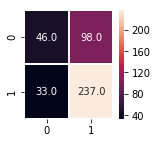

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

## Train Confusion Matrix

In [40]:
train_cm = confusion_matrix(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],labels=['accept','reject'])
train_cm

stackedensemble prediction progress: |████████████████████████████████████| 100%


array([[304, 126],
       [  3, 806]], dtype=int64)

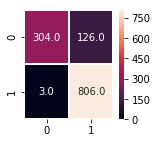

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(train_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [42]:
test_accuracy = accuracy_score(test['status'], predictions.as_data_frame()['predict'])
print('test_accuracy:',test_accuracy)
train_accuracy = accuracy_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'])
print('train_accuracy:',train_accuracy)
from sklearn.metrics import f1_score
test_f1_score = f1_score(test['status'], predictions.as_data_frame()['predict'],pos_label='accept')
print('test_f1_score:',test_f1_score)
train_f1_score = f1_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],pos_label='accept')
print('train_f1_score:',train_f1_score)

test_accuracy: 0.6835748792270532
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_accuracy: 0.8958837772397095
test_f1_score: 0.4125560538116592
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_f1_score: 0.8249660786974219


# AUC-ROC Curve

stackedensemble prediction progress: |████████████████████████████████████| 100%


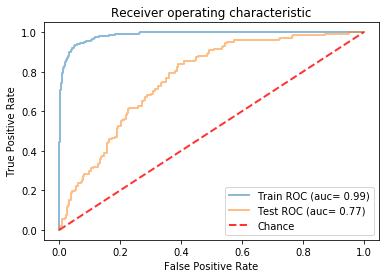

In [43]:
#test and train roc
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test['status'], predictions.as_data_frame()['accept'],pos_label='accept')
test_roc_auc = auc(test_fpr, test_tpr)
train_fpr,train_tpr,train_thresholds = metrics.roc_curve(train['status'], saved_model.predict(train_frame).as_data_frame()['accept'],pos_label='accept')
train_roc_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
             label='Train ROC (auc= %0.2f)' % (train_roc_auc))
plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
             label='Test ROC (auc= %0.2f)' % (test_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
predictions.as_data_frame()['predict']

0      reject
1      reject
2      reject
3      reject
4      reject
5      reject
6      reject
7      reject
8      reject
9      accept
10     reject
11     reject
12     reject
13     reject
14     reject
15     accept
16     accept
17     reject
18     accept
19     reject
20     accept
21     accept
22     reject
23     reject
24     reject
25     reject
26     accept
27     accept
28     reject
29     accept
        ...  
384    reject
385    reject
386    reject
387    reject
388    accept
389    reject
390    reject
391    reject
392    reject
393    reject
394    reject
395    reject
396    reject
397    reject
398    accept
399    accept
400    reject
401    reject
402    reject
403    reject
404    reject
405    accept
406    accept
407    reject
408    reject
409    reject
410    accept
411    accept
412    reject
413    accept
Name: predict, Length: 414, dtype: object

In [45]:
testing_df=test_frame.as_data_frame().join(predictions.as_data_frame())

In [49]:
wrong_prediction = testing_df.loc[testing_df['status']!=testing_df['predict'],:]

In [51]:
# List of wrong predictions
wrong_prediction

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,status,predict,accept,reject
0,322,170,152,110,2.67,24,3,accept,reject,0.291846,0.708154
2,314,162,152,107,2.40,9,0,accept,reject,0.198739,0.801261
7,309,161,148,102,3.62,0,0,accept,reject,0.350832,0.649168
10,304,155,149,106,3.41,27,0,accept,reject,0.288983,0.711017
13,307,157,150,104,2.62,11,0,accept,reject,0.178859,0.821141
18,324,167,157,101,2.56,82,3,reject,accept,0.592769,0.407231
20,332,170,162,115,2.62,4,3,reject,accept,0.569970,0.430030
21,312,162,150,113,3.74,4,3,reject,accept,0.582979,0.417021
26,318,165,153,104,3.42,14,2,reject,accept,0.776225,0.223775
27,319,161,158,111,2.96,6,0,reject,accept,0.649425,0.350575


<b> Summarization of the H2o.ai Results</b>

Best 4 Model have been summarized below:
- StackedEnsemble_AllModels_AutoML_20190425_050507
- StackedEnsemble_BestOfFamily_AutoML_20190425_050507
- GBM_2_AutoML_20190425_050507
- GBM_5_AutoML_20190425_050507

<b> Best Model Summary : StackedEnsemble_AllModels_AutoML_20190425_050507</b>
<table>
  <tr>
    <th>Model</th>
    <th>Train Accuracy</th> 
    <th>Test Accuracy</th>
    <th>F1 Score - Train</th> 
    <th>F1 Score - Test</th>
    <th>AUC-ROC Curve - Test</th>
    <th>AUC-ROC Curve - Train</th>
  </tr>
  <tr>
    <td>StackedEnsemble_AllModels_AutoML_20190421_184847</td>
    <td>0.90</td> 
    <td>0.68</td>
    <td>0.89</td> 
    <td>0.41</td>
    <td>0.77</td> 
    <td>0.99</td>
  </tr>

</table>